### Importing the Libraries

In [2]:
#pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=5ea63ff840876be32d5da69ef81ed1d4c8ba7d29a3e4dbab9c4faafadfb8807e
Note: you may need to restart the kernel to use updated packages.
  Stored in directory: c:\users\jeetp\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [2]:
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D 
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
## conda install pydotplus
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#from nltk.stem import WordNetLemmatizer 
#LEMMER = WordNetLemmatizer() 

from nltk.stem.porter import PorterStemmer

In [3]:
filenameNum="Housing_Num_with_labels.csv"
StudentDF_Num=pd.read_csv(filenameNum)
StudentDF_Num.head()


,MSZoning,LotFrontage,TotalBsmtSF,1stFlrSF,BedroomAbvGr,GarageCars,GarageArea,SalePrice
0,Commercial,50,649,649,3,1,250,40000
1,Floating Village,84,1656,1656,3,3,826,249700
2,Floating Village,24,970,983,3,2,480,172500
3,Floating Village,40,612,612,2,2,528,164500
4,Commercial,60,1214,1260,4,2,506,133900


#### Splitting the Data in Training and Testing

In [4]:
### Because the data is already clean and ready - I can seperate it
## into TRAINING and TESTING sets
####-----------------------------------------------
#from sklearn.model_selection import train_test_split
StudentTrainDF_Num, StudentTestDF_Num = train_test_split(StudentDF_Num, test_size=0.3)


#### Removing the Labels from Data

In [5]:
######## Seperate LABELS FROM DATA--------------------
## Make sure you know the name of the label
## For both datasets above  - in this case - it is "Decision"
## TEST - Num
StudentTestLabels_Num=StudentTestDF_Num["MSZoning"]  ## save labels
print(StudentTestLabels_Num)
StudentTestData_Num = StudentTestDF_Num.drop(["MSZoning"], axis=1)  ##drop labels
print(StudentTestData_Num)

## TRAIN - Num
StudentTrainLabels_Num=StudentTrainDF_Num["MSZoning"]  ## save labels
print(StudentTrainLabels_Num)
StudentTrainData_Num = StudentTrainDF_Num.drop(["MSZoning"], axis=1)  ##drop labels
print(StudentTrainData_Num)


16     Floating Village
2      Floating Village
141         Residential
71          Residential
135         Residential
15     Floating Village
42     Floating Village
14     Floating Village
114         Residential
116         Residential
148         Residential
107         Residential
168         Residential
163    Floating Village
108         Residential
67          Residential
104         Residential
49     Floating Village
21     Floating Village
73          Residential
111         Residential
30     Floating Village
82          Residential
77          Residential
61          Residential
22     Floating Village
59          Residential
81          Residential
96     Floating Village
62          Residential
160    Floating Village
48     Floating Village
78          Residential
164    Floating Village
88          Residential
94          Residential
140         Residential
97          Residential
92          Residential
32     Floating Village
161    Floating Village
79          Resi

#### min-max Scaling to get in range of 0 to 1

In [6]:
## SCALE ALL DATA to between 0 and 1
#from sklearn import preprocessing
###########################################################
x = StudentTrainData_Num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
StudentTrainData_Num_S = pd.DataFrame(x_scaled)

x2 = StudentTestData_Num.values #returns a numpy array
min_max_scaler2 = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler2.fit_transform(x2)
StudentTestData_Num_S = pd.DataFrame(x_scaled2)
print(StudentTestData_Num_S)


           0         1         2         3    4         5         6
0   0.573529  0.555797  0.560550  1.000000  0.5  0.508876  0.369379
1   0.000000  0.223734  0.244844  0.666667  0.5  0.355030  0.108566
2   0.191176  0.408274  0.433104  0.333333  0.5  0.359763  0.120245
3   0.477941  0.579750  0.583818  0.333333  1.0  0.682840  0.247926
4   0.735294  0.250408  0.442623  0.333333  0.0  0.156213  0.115573
5   0.375000  0.287970  0.300370  0.666667  1.0  1.000000  0.260383
6   0.375000  0.340229  0.351137  1.000000  0.5  0.437870  0.312509
7   0.308824  0.226456  0.240613  0.666667  0.5  0.468639  0.212113
8   0.433824  0.615133  0.618191  0.666667  1.0  0.915976  0.226637
9   0.610294  0.825803  0.822845  0.333333  1.0  0.792899  0.564015
10  0.264706  0.236799  0.453728  1.000000  0.0  0.298225  0.007356
11  0.338235  0.297768  0.354310  0.666667  0.5  0.426036  0.046283
12  0.375000  0.379423  0.389212  0.666667  0.0  0.113609  0.069639
13  0.448529  0.249320  0.267583  0.666667  1.0 

### Naive Bayes

In [7]:
####################################################################
########################### Naive Bayes ############################
####################################################################
#from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler

############# In Python - unlike R - you cannot run a standard NB on 
## Mixed data. Therefore, we will only run it on our numeric dataset.
##################
MyModelNB_Num= MultinomialNB()

## When you look up this model, you learn that it wants the 
## DF seperate from the labels

MyModelNB_Num.fit(StudentTrainData_Num, StudentTrainLabels_Num)
PredictionNB = MyModelNB_Num.predict(StudentTestData_Num)



#### Confusion Matrix

In [8]:
## confusion matrix
#from sklearn.metrics import confusion_matrix
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
cnf_matrix = confusion_matrix(StudentTestLabels_Num, PredictionNB)
print("\nThe confusion matrix is:")
print(cnf_matrix)
### prediction probabilities
## columns are the labels in alphabetical order
## The decinal in the matrix are the prob of being
## that label
print(np.round(MyModelNB_Num.predict_proba(StudentTestData_Num),2))
MyModelNB_Num.get_params(deep=True)




The confusion matrix is:
[[ 0  0  1]
 [ 0 13  7]
 [ 2  8 20]]
[[0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.68 0.32]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.81 0.19]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]]


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

#### Visualization

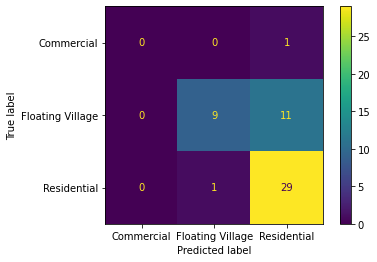

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=bn_matrix_R, display_labels = MyDT_R.classes_)
disp.plot()
plt.show()

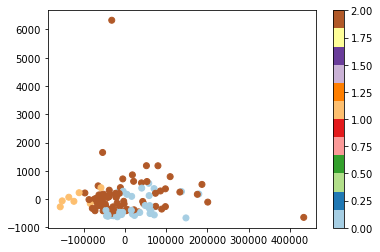

In [9]:
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
## remap labels to numbers to view
ymap=StudentTrainLabels_Num
ymap=ymap.replace("Commercial", 1)
ymap=ymap.replace("Floating Village", 0)
ymap=ymap.replace("Residential", 2)


pca = PCA(n_components=3)
proj = pca.fit_transform(StudentTrainData_Num)
plt.scatter(proj[:, 0], proj[:, 1], c=ymap, cmap="Paired")
plt.colorbar()



## Decision Tree

Index(['LotFrontage', 'TotalBsmtSF', '1stFlrSF', 'BedroomAbvGr', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


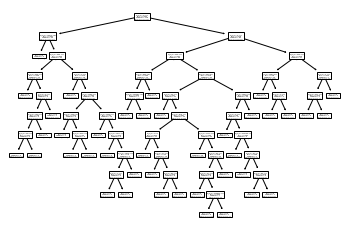

In [57]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#########################################################
#############    Decision Trees   #######################
#########################################################
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
## In Python - the Decision Trees work ONLY on numeric data


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='random',  ## or "random" or "best"
                            max_depth=None,   ##None by Professor, we can keep "3" gives 3 level depth
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            #min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(StudentTrainData_Num, StudentTrainLabels_Num)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=StudentTrainData_Num.columns
print(feature_namesR)



#### Saving the Decision Tree localyy

In [17]:
#pip install graphviz

In [59]:
##--------------------------------------------------------
## VIS 1 saved as Tree_Record.pdf
##-----------------------------------------------------------
from sklearn import tree
import graphviz
TREE_data = tree.export_graphviz(MyDT_R, out_file=None,
                  feature_names=StudentTrainData_Num.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 

                                   
graph = graphviz.Source(TREE_data) 
graph.render("Tree_Record") 



'Tree_Record.pdf'

In [ ]:
##---
## Show the predictions from the DT on the test set
#print("\nActual\n")
#print(StudentTestLabels_Num)
#print("Prediction\n")
DT_pred_R=MyDT_R.predict(StudentTestData_Num)
#print(DT_pred_R)
##_--
## Show the confusion matrix
bn_matrix_R = confusion_matrix(StudentTestLabels_Num, DT_pred_R)
print("\nThe confusion matrix is:")
print(bn_matrix_R)


## Feature Importance

In [32]:
##---
## Feature Importance
FeatureImpR=MyDT_R.feature_importances_   
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
print ("feature name: ", feature_namesR[indicesR])

## print out the important features.....
for f in range(StudentTrainData_Num.shape[1]):
    if FeatureImpR[indicesR[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indicesR[f], FeatureImpR[indicesR[f]]))
        print ("feature name: ", feature_namesR[indicesR[f]])



feature name:  Index(['SalePrice', '1stFlrSF', 'GarageArea', 'LotFrontage', 'TotalBsmtSF',
       'BedroomAbvGr', 'GarageCars'],
      dtype='object')
1. feature 6 (0.286609)
feature name:  SalePrice
2. feature 2 (0.262830)
feature name:  1stFlrSF
3. feature 5 (0.234758)
feature name:  GarageArea
4. feature 0 (0.097060)
feature name:  LotFrontage
5. feature 1 (0.092633)
feature name:  TotalBsmtSF
6. feature 3 (0.026110)
feature name:  BedroomAbvGr


100         Residential
132         Residential
117         Residential
110         Residential
84          Residential
             ...       
128         Residential
39     Floating Village
167         Residential
41     Floating Village
18     Floating Village
Name: MSZoning, Length: 118, dtype: object
100         Residential
132         Residential
117         Residential
110         Residential
84          Residential
             ...       
128         Residential
39     Floating Village
167         Residential
41     Floating Village
18     Floating Village
Name: MSZoning, Length: 118, dtype: object
35310


MemoryError: Unable to allocate 23.6 PiB for an array with shape (5632000, 589691000) and data type float64

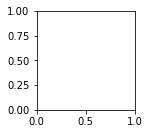

In [34]:
## FYI for small datasets you can zip features....
## print(dict(zip(iris_pd.columns, clf.feature_importances_)))
#######-----------------------------------------------------
##  Visualize Decision Trees plotting paired surfaces
##
#####--------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

f1=StudentTrainData_Num.columns.get_loc("SalePrice") 
f2=StudentTrainData_Num.columns.get_loc("TotalBsmtSF") 

n_classes =2
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[f1, f2], [0, 2], [0, 3],
                                [1, 2], [1, 3]]):
    #print(TrainDF1.iloc[:,pair])
    X = StudentTrainData_Num.iloc[:, pair]
    ## Because we are plotting, using our GOD and HIKE labels will not work
    ## we need to change them to 0 and 1
    y = StudentTrainLabels_Num
    print(y)
    oldy=y
    #print(type(y))
    y=y.replace("Admit", 1)
    y=y.replace("Decline", 0)
    y=y.replace("Wait", 2)
    
    print(y)
    # Train
    DTC = DecisionTreeClassifier().fit(X, y)
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    print(x_min)
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
   
    xx, yy = np.meshgrid(np.arange(x_min, x_max,plot_step),
                         np.arange(y_min, y_max,plot_step))
    
    #print(yy)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#
    Z = DTC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)
    
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
       
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=oldy,edgecolor='black', 
                    #c=color, s=15)
                    #label=y[i],
                    cmap=plt.cm.RdYlBu)
###---------------------------end for loop ----------------------------------
#plt.suptitle("Decision surface of a decision tree using paired features: Student Admissions")
#plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#plt.axis("tight")
#
#plt.figure()
######################################################
    ##  MORE DT Vis...................................
###########################################################
# dot_data2 = StringIO()

# export_graphviz(MyDT_R, out_file=dot_data2,  
#                 filled=True, rounded=True,
#                 special_characters=True,
#                 feature_names = StudentTrainData_Num.columns)

#                 #class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
# graph.write_png('StudentData.png')
# Image(graph.create_png())


#########################################################

In [40]:
## Confusion Matrix Visual Code

import seaborn as sns
import matplotlib.pyplot as plt     

##########################################################
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


cm = confusion_matrix(StudentTestLabels_Num, StudentTestData_Num, labels=StudentDF_Num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=StudentDF_Num.classes_)                         
disp.plot()
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets


The confusion matrix is:
[[10  1  0]
 [ 0  6  2]
 [ 0  0  8]]

The confusion matrix is:
[[10  1  0]
 [ 2  6  0]
 [ 2  0  6]]




The confusion matrix is:
[[10  0  1]
 [ 0  6  2]
 [ 0  0  8]]




The confusion matrix is:
[[10  1  0]
 [ 0  6  2]
 [ 0  0  8]]





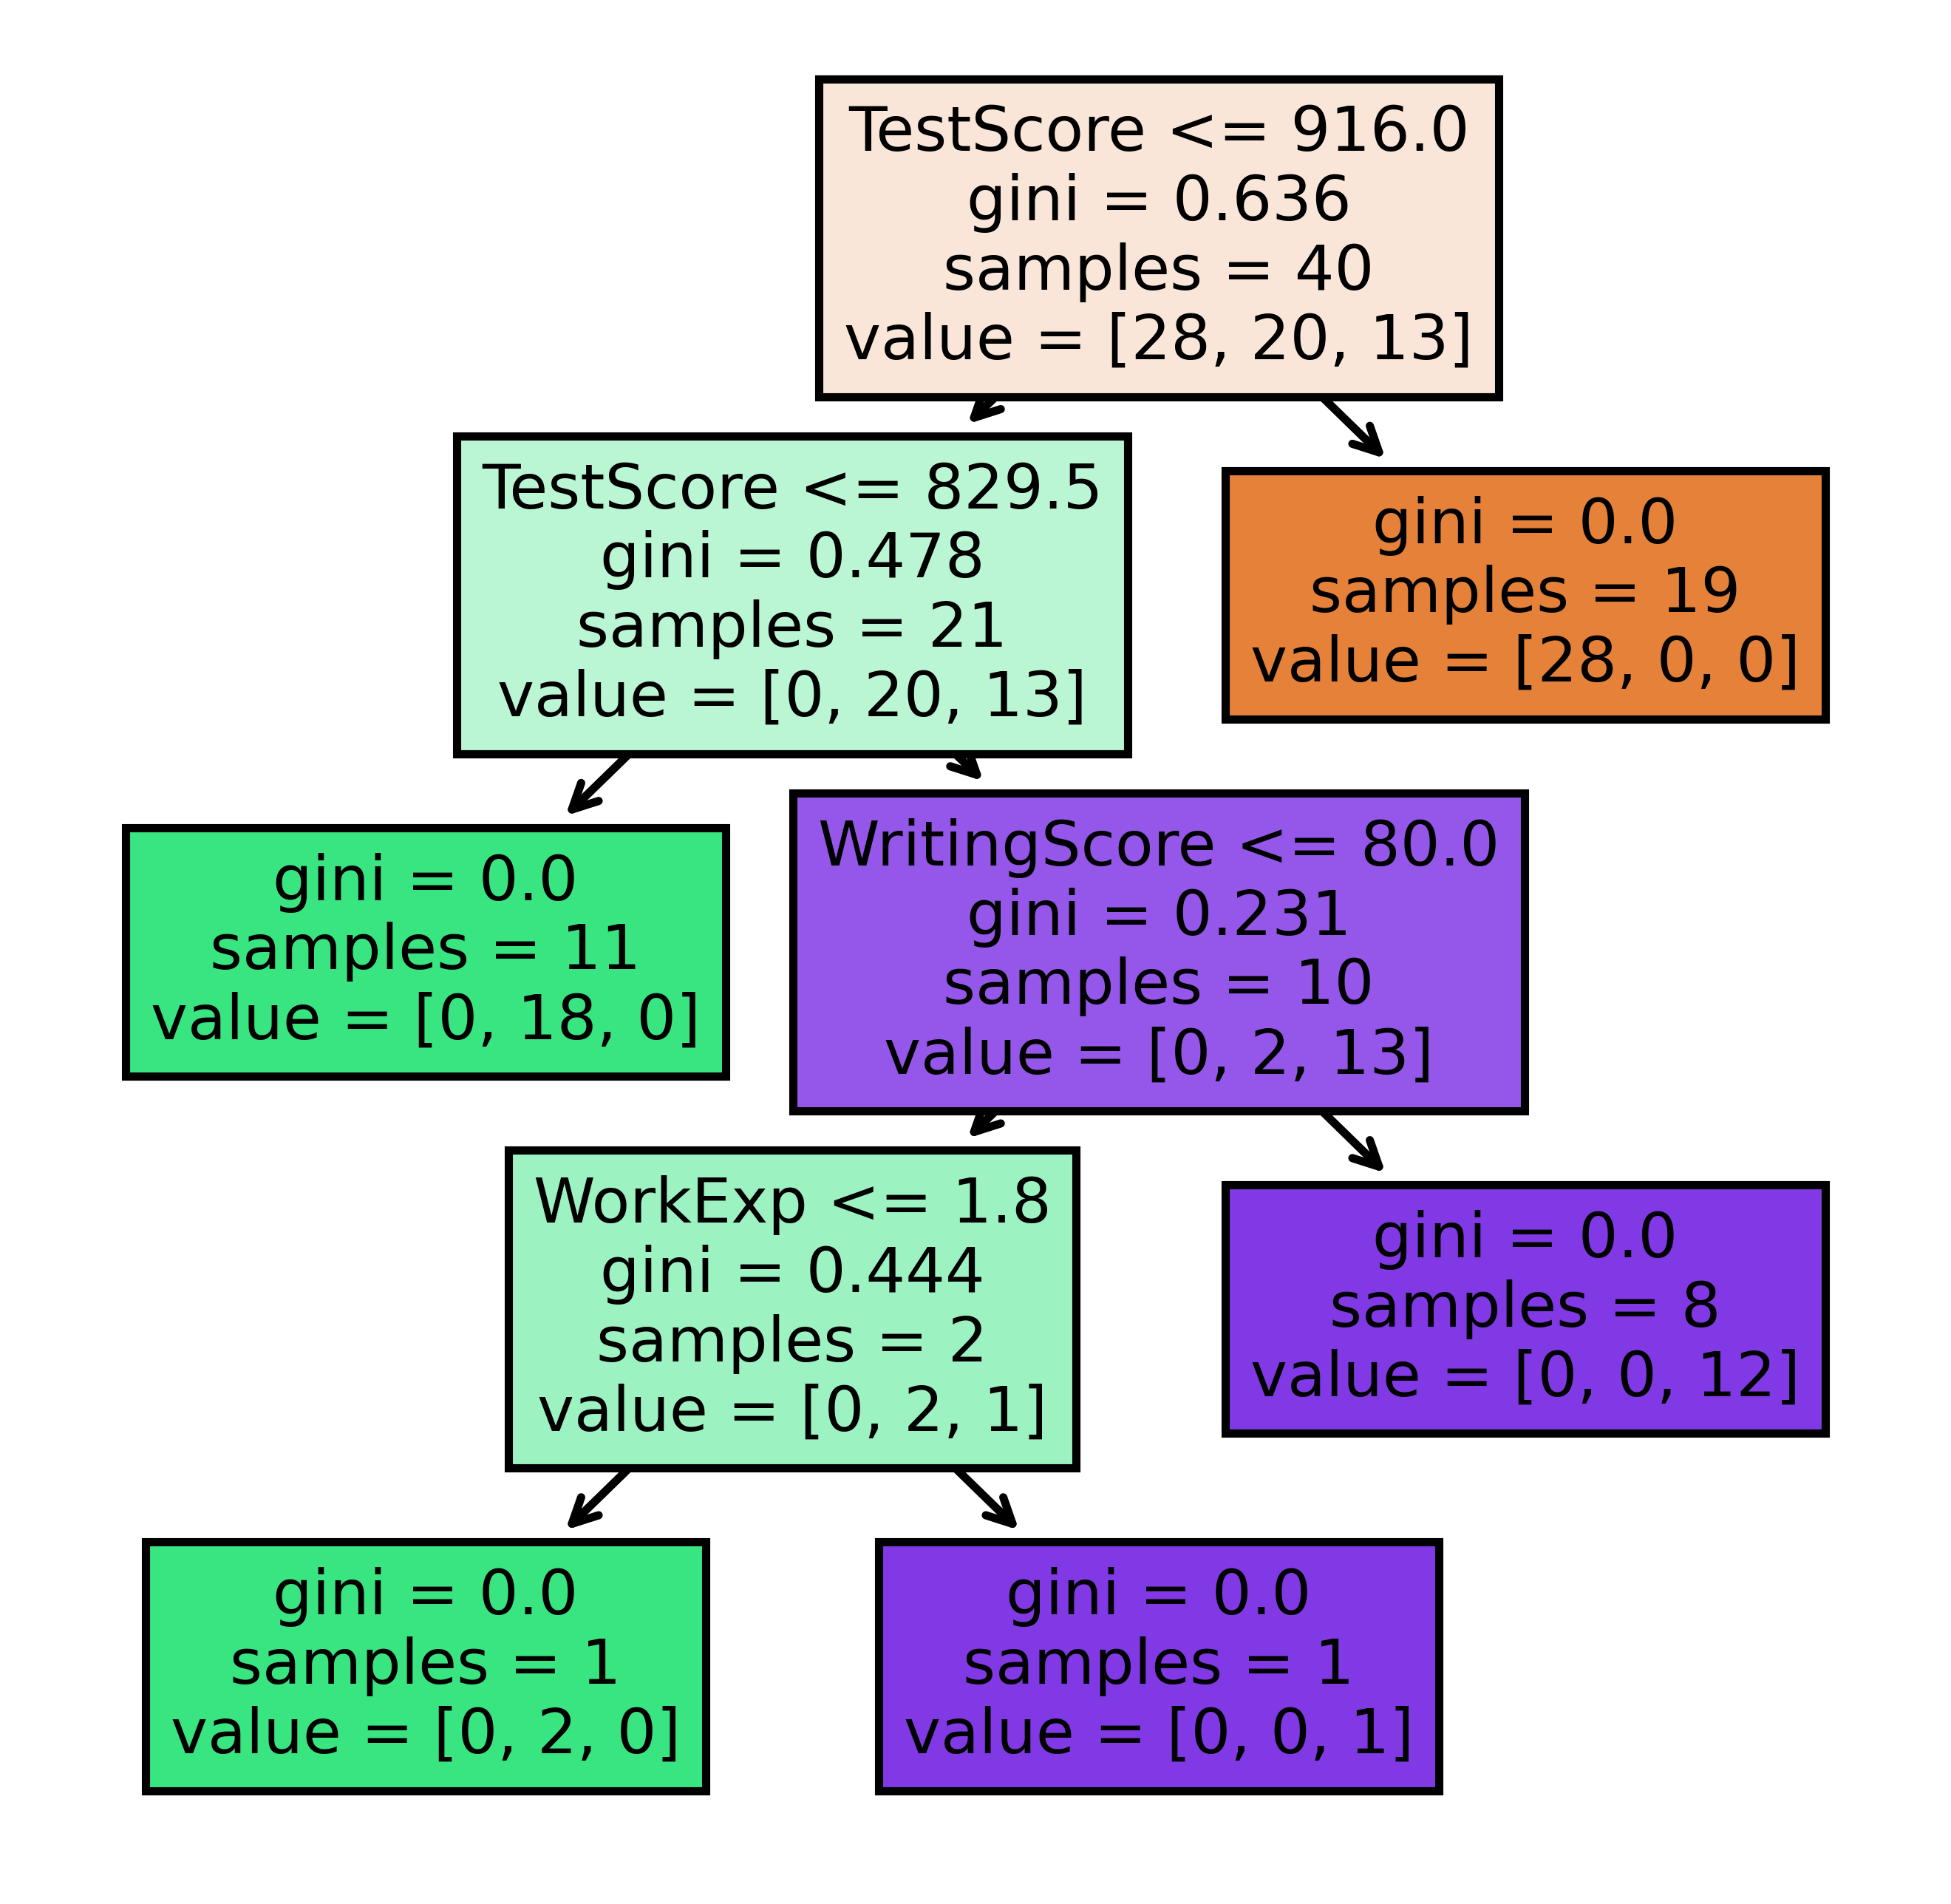

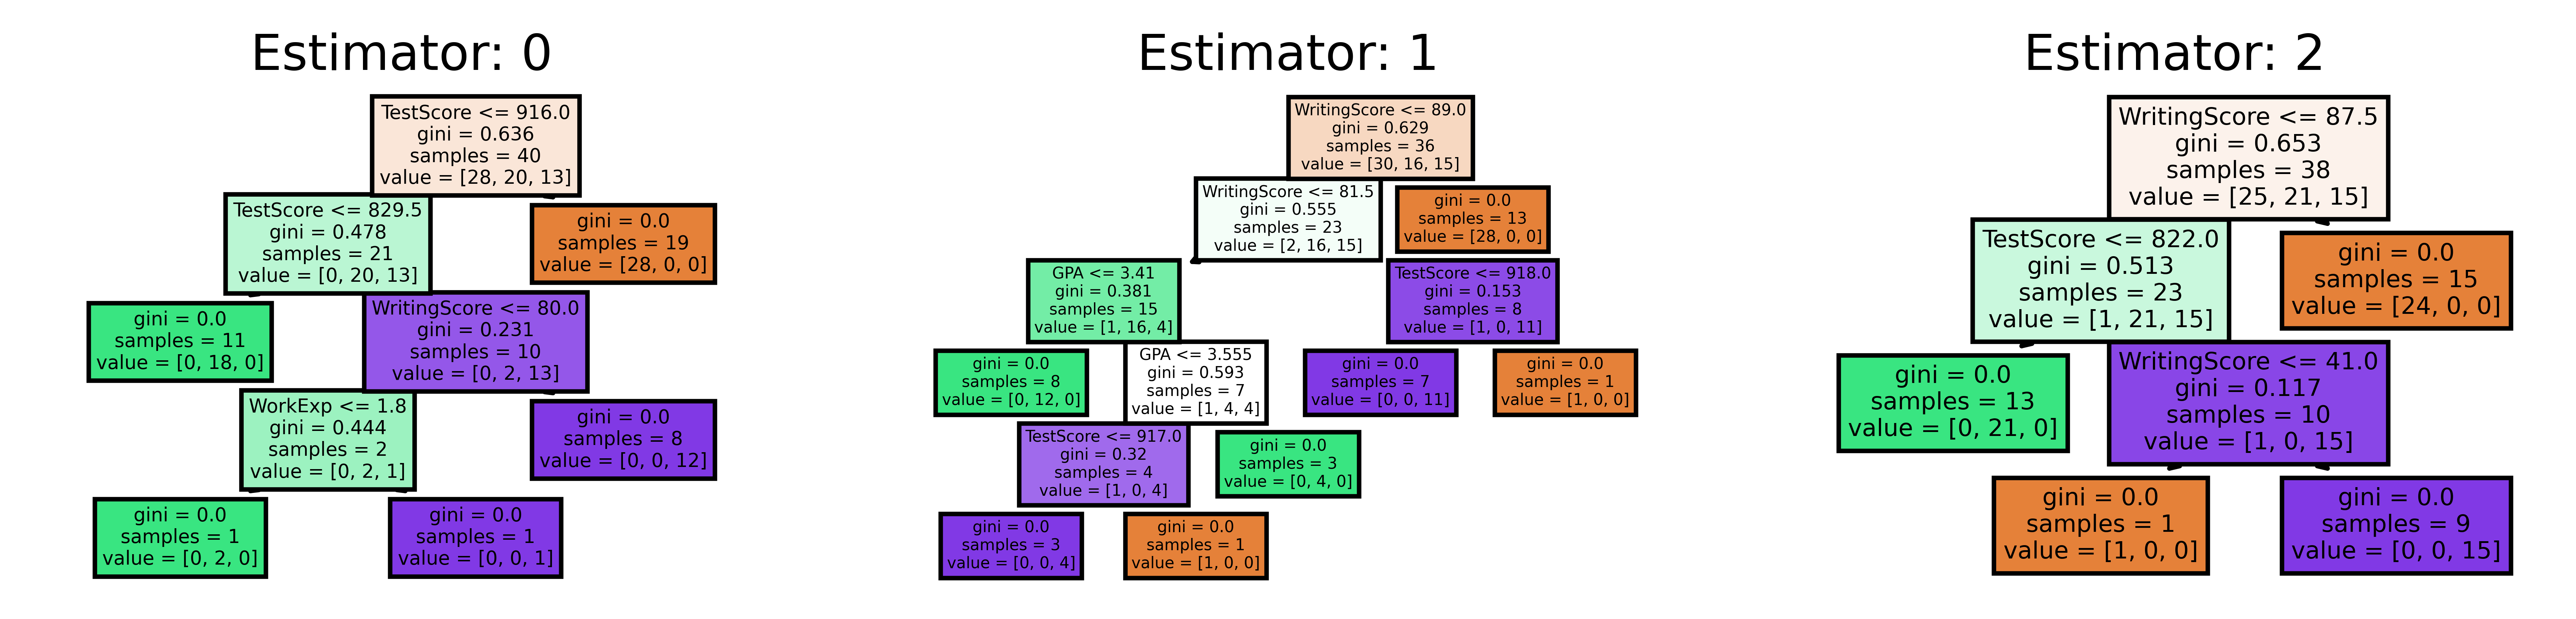

In [25]:
#########################################################
##
##                 Random Forest
##
#################################################################


RF1 = RandomForestClassifier()
RF1.fit(StudentTrainData_Num, StudentTrainLabels_Num)
RF1_pred=RF1.predict(StudentTestData_Num)

bn_matrix_RF = confusion_matrix(StudentTestLabels_Num, RF1_pred)
print("\nThe confusion matrix is:")
print(bn_matrix_RF)

################# VIS RF---------------------------------
Features=StudentTrainData_Num.columns
#Targets=StudentTestLabels_Num

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(RF1.estimators_[0],
               feature_names = Features, 
               #class_names=Targets,
               filled = True)

fig.savefig('RF_Tree')  ## creates png

#####------------------> View estimator Trees in RF

fig2, axes2 = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(RF1.estimators_[index],
                   feature_names = Features, 
                   filled = True,
                   ax = axes2[index])

    axes2[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig2.savefig('THREEtrees_RF.png')






# SVM

In [ ]:
##@@@@@@@@@@@@@@@@@@@@@@@
#############################################
###########  SVM ############################
#############################################
#from sklearn.svm import LinearSVC
### NOTE - We CANNOT use SVM directly on the data. 
### SVMs do not run on qualitative data.
    
############  MUST NORMALIZE THE DATA!!  ################
    ## This is done above. Notice the _S for scale after each DF


##-----


SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(StudentTrainData_Num_S, StudentTrainLabels_Num)

#print("SVM prediction:\n", SVM_Model1.predict(StudentTestData_Num_S))
#print("Actual:")
#print(StudentTestLabels_Num)

SVM_matrix = confusion_matrix(StudentTestLabels_Num, SVM_Model1.predict(StudentTestData_Num_S))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")



#--------------other kernels
## RBF
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(StudentTrainData_Num_S, StudentTrainLabels_Num)

#print("SVM prediction:\n", SVM_Model2.predict(StudentTestData_Num_S))
#print("Actual:")
#print(StudentTestLabels_Num)

SVM_matrix2 = confusion_matrix(StudentTestLabels_Num, SVM_Model2.predict(StudentTestData_Num_S))
print("\nThe confusion matrix is:")
print(SVM_matrix2)
print("\n\n")

##------------------------------
## POLY
SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly', degree=2, gamma="auto")
SVM_Model3.fit(StudentTrainData_Num_S, StudentTrainLabels_Num)

#print("SVM prediction:\n", SVM_Model3.predict(StudentTestData_Num_S))
#print("Actual:")
#print(StudentTestLabels_Num)

SVM_matrix3 = confusion_matrix(StudentTestLabels_Num, SVM_Model3.predict(StudentTestData_Num_S))
print("\nThe confusion matrix is:")
print(SVM_matrix3)
print("\n\n")
